In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

We will start by generating 'data' for the Linear Regression

In [3]:
#Figure out how to install Tensorboard
x_data = np.random.randn(2000,3) #2000x3 matrix of random numbers
w_real = np.array([[0.278], [0.494], [0.134]]) #Array of 3 weights (one for each x)
b_real = 1.709 #threshold

In [4]:
noise = np.random.randn(2000,1)*0.1 #2000x1 matrix of error on each point
y_data = np.matmul(x_data, w_real) + b_real + noise #Plotting one y value for a triplet of x

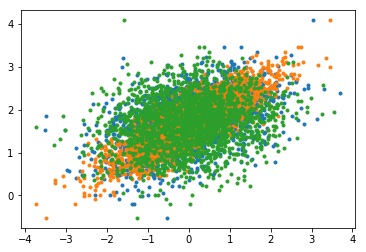

In [5]:
plt.plot(x_data, y_data, '.')
plt.show()

We need to add timestamps to the log directory names

In [6]:
from datetime import datetime

In [7]:
now = datetime.utcnow().strftime("%Y%m%d%H%M%S") #Saving graphs with time, appending time to name of file
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

We will now estimate the parameters w and b from the noisy data.

In [10]:
steps = 500 #500 passes through the data

x = tf.placeholder(tf. float32, shape=[None,3]) #Holds the triplets of x
y_true = tf.placeholder(tf.float32, shape=None) #Holds the true values of y (computed above)

with tf.name_scope('inference') as scope:
    w = tf.Variable([[0],[0],[0]], dtype=tf.float32, name='weights') #Initializing the three weights as 0
    b = tf.Variable(0, dtype=tf.float32, name='bias') #Initializing the threshold as 0
    y_pred = tf.matmul(x,w)+b #Expressing the predicted y as a linear combination
    
with tf.name_scope('variance') as scope:
    mse = tf.reduce_mean(tf.square(y_true-y_pred)) #Mean squared error
    y_mean = tf.reduce_mean(y_true) #Average of the true y values
    mst = tf.reduce_mean(tf.square(y_true-y_mean)) #MST
    c_of_determination = 1-mse/mst #R-squared
    
with tf.name_scope('train') as scope:
    learning_rate = 0.005
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(mse) #Gradient descent to minimize mean squared error (as a function of w and b)

In [11]:
init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse) #Keeps track of MSE after each step
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph()) #This has to be the last thing in the construction phase

In [12]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        sess.run(train, feed_dict={x: x_data, y_true: y_data}) #Training on all of the x and y data each time
        #At this point, the weights and threshold have been adjusted through gradient descent
        W, B, MSE, CD = sess.run([w, b, mse, c_of_determination], feed_dict={x: x_data, y_true: y_data})
        #Computed mean squared error and R-squared
        if (i+1) % 50 == 0:
            summary_str = mse_summary.eval(feed_dict={x: x_data, y_true: y_data}) #Computing scalar value
            file_writer.add_summary(summary_str, i) #Adding it to log file
            print("Steps {}".format(i+1), "Weights {}".format(W.T), "Bias {:.4f}".format(B), "MSE {:.4f}".format(MSE))
    print("\nCoefficient of Determination {}".format(CD))
    print("\nTrue Weights {}".format(w_real.T), "True bias {}".format(b_real))
    file_writer.close() #The last command is closing the writer

Steps 50 Weights [[ 0.10800455  0.19617277  0.04997858]] Bias 0.6749 MSE 1.2023
Steps 100 Weights [[ 0.17366779  0.31426594  0.08130728]] Bias 1.0833 MSE 0.4466
Steps 150 Weights [[ 0.21358857  0.38536867  0.10091987]] Bias 1.3303 MSE 0.1700
Steps 200 Weights [[ 0.23785861  0.42818651  0.11318307]] Bias 1.4798 MSE 0.0687
Steps 250 Weights [[ 0.25261366  0.45397586  0.12084239]] Bias 1.5702 MSE 0.0317
Steps 300 Weights [[ 0.26158395  0.46951169  0.1256213 ]] Bias 1.6249 MSE 0.0181
Steps 350 Weights [[ 0.26703724  0.47887224  0.12860015]] Bias 1.6580 MSE 0.0131
Steps 400 Weights [[ 0.27035263  0.48451313  0.1304553 ]] Bias 1.6781 MSE 0.0113
Steps 450 Weights [[ 0.2723681   0.48791298  0.13160966]] Bias 1.6902 MSE 0.0107
Steps 500 Weights [[ 0.27359346  0.48996255  0.13232742]] Bias 1.6975 MSE 0.0104

Coefficient of Determination 0.9700303077697754

True Weights [[ 0.278  0.494  0.134]] True bias 1.709


http://euler.vaniercollege.qc.ca:8080/#scalars

Install TensorBoard at home (it shows how the variables interact). You need to create a log directory. By tracking the scalar (MSE summary), you can see how the error decreases with each iteration.